Import the CSV file

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving all-weeks-countries.csv to all-weeks-countries.csv


In [2]:
file_name = list(uploaded.keys())[0]
top10 = pd.read_csv(file_name)

top10 = pd.DataFrame(top10)

top10.info()
top10.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112300 entries, 0 to 112299
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                112300 non-null  object
 1   country_iso2                112300 non-null  object
 2   week                        112300 non-null  object
 3   category                    112300 non-null  object
 4   weekly_rank                 112300 non-null  int64 
 5   show_title                  112300 non-null  object
 6   season_title                54668 non-null   object
 7   cumulative_weeks_in_top_10  112300 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


,weekly_rank,cumulative_weeks_in_top_10
count,112300.000000,112300.000000
mean,5.500000,3.468281
std,2.872294,5.518189
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.500000,2.000000
75%,8.000000,3.000000
max,10.000000,60.000000


Preliminary analysis

Text(0, 0.5, 'Frequency')

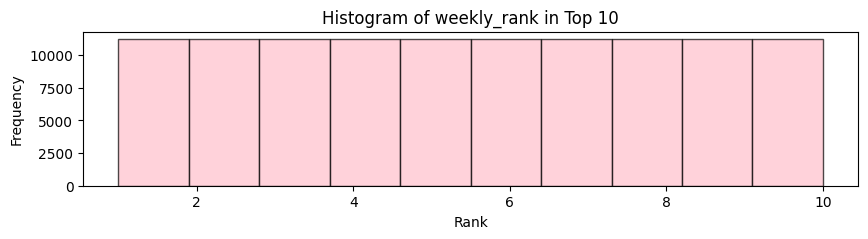

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
plt.hist(top10['weekly_rank'], bins=10, edgecolor='black', alpha=0.7, color='pink')
plt.title('Histogram of weekly_rank in Top 10')
plt.xlabel('Rank')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

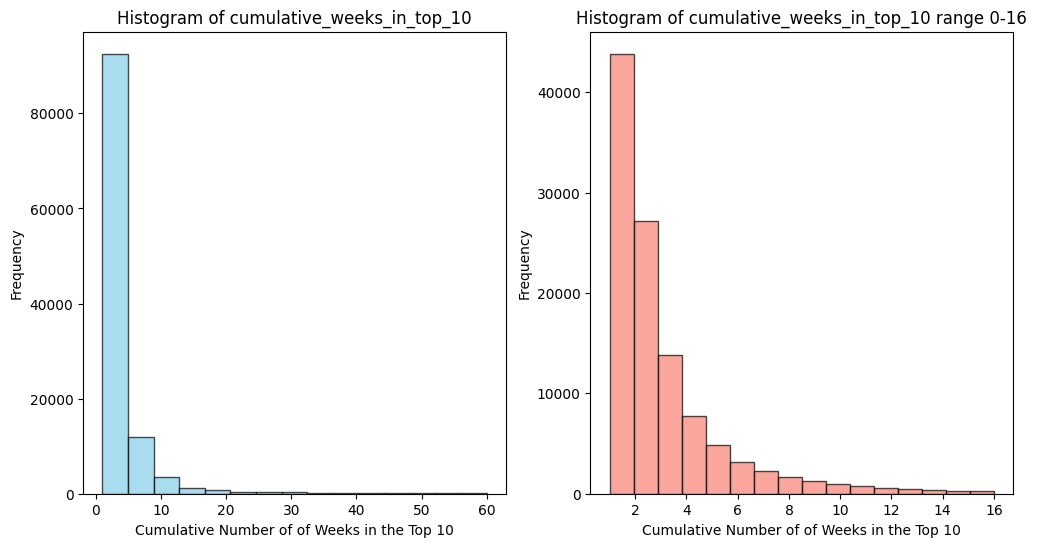

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(top10['cumulative_weeks_in_top_10'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Histogram of cumulative_weeks_in_top_10')
axes[0].set_xlabel('Cumulative Number of of Weeks in the Top 10')
axes[0].set_ylabel('Frequency')

axes[1].hist(top10['cumulative_weeks_in_top_10'], bins=16, range=(1, 16), edgecolor='black', alpha=0.7, color='salmon')
axes[1].set_title('Histogram of cumulative_weeks_in_top_10 range 0-16')
axes[1].set_xlabel('Cumulative Number of of Weeks in the Top 10')
axes[1].set_ylabel('Frequency')


<ipython-input-5-4c8b6dacff89>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = top10.var()


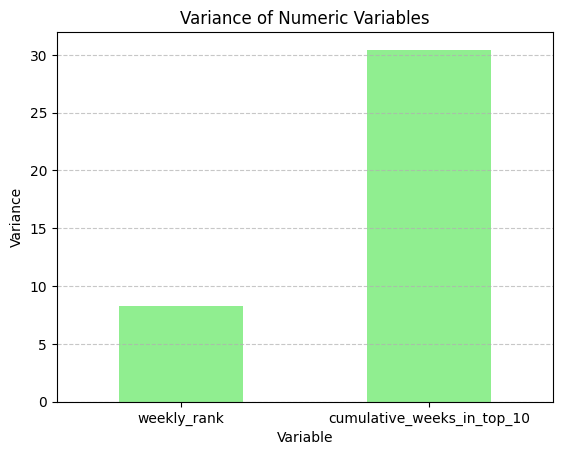

In [5]:
variances = top10.var()

variances.plot(kind='bar', color='lightgreen')
plt.title('Variance of Numeric Variables')
plt.xlabel('Variable')
plt.ylabel('Variance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

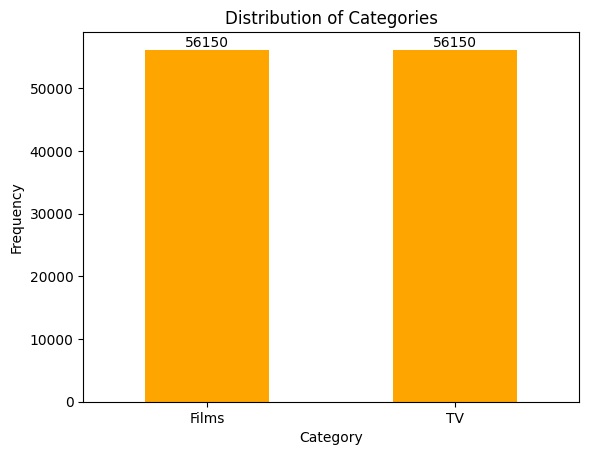

In [6]:
category_counts = top10['category'].value_counts()
category_counts.plot(kind='bar', color='orange')

for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

94


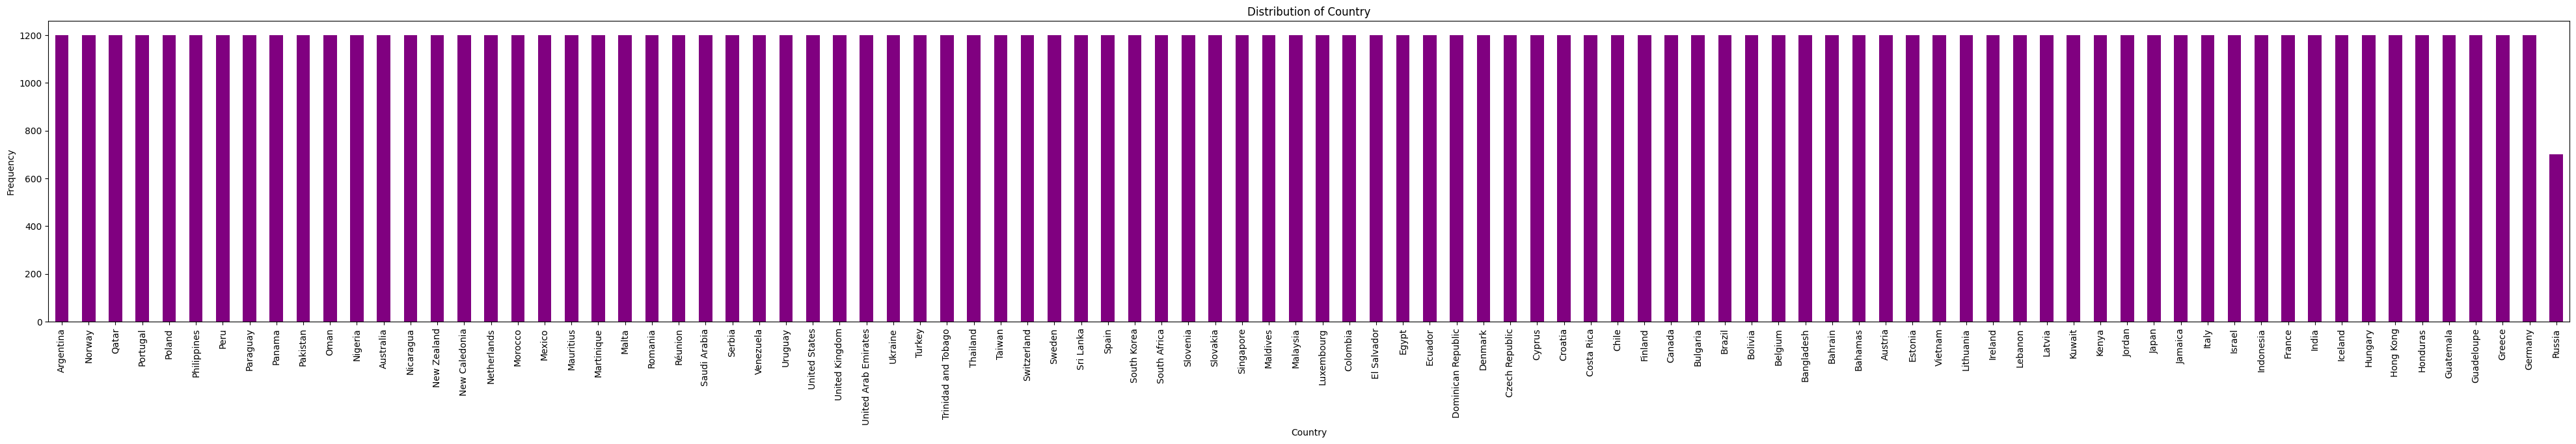

In [7]:
plt.figure(figsize=(50, 6))
top10['country_name'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')

print(top10['country_name'].nunique())

plt.title('Distribution of Country')
plt.xticks(rotation=90)
plt.show()

In [8]:
spearman_corr = top10[['weekly_rank', 'cumulative_weeks_in_top_10']].corr(method='spearman')
print(spearman_corr)

                            weekly_rank  cumulative_weeks_in_top_10
weekly_rank                    1.000000                    0.028064
cumulative_weeks_in_top_10     0.028064                    1.000000


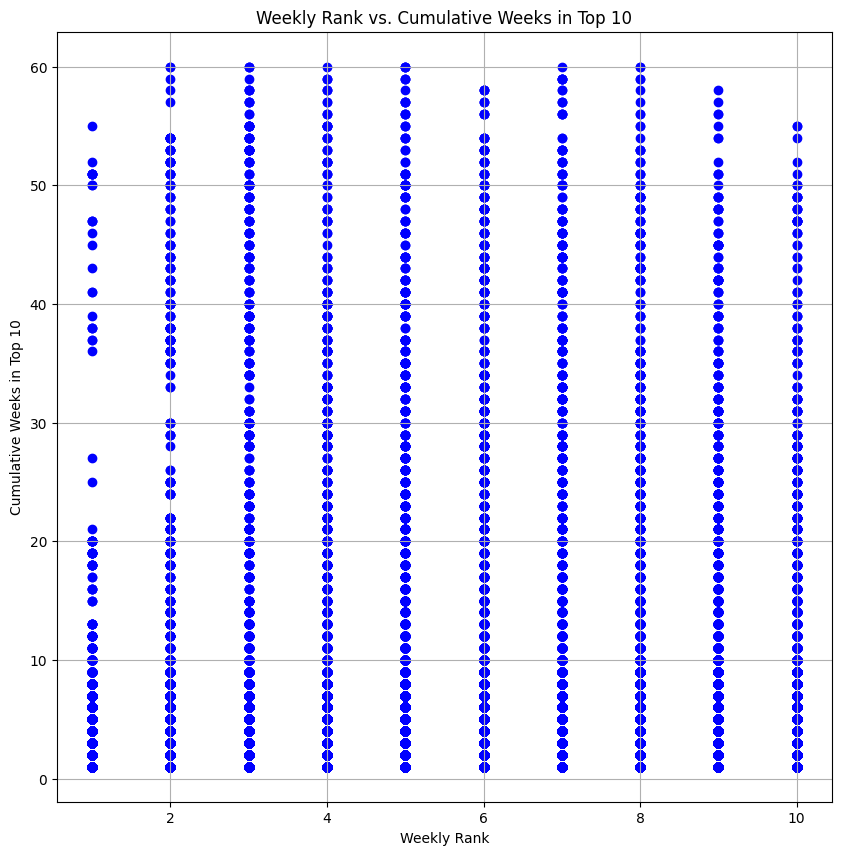

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(top10['weekly_rank'], top10['cumulative_weeks_in_top_10'], color='blue')
plt.title('Weekly Rank vs. Cumulative Weeks in Top 10')
plt.xlabel('Weekly Rank')
plt.ylabel('Cumulative Weeks in Top 10')
plt.grid(True)
plt.show()

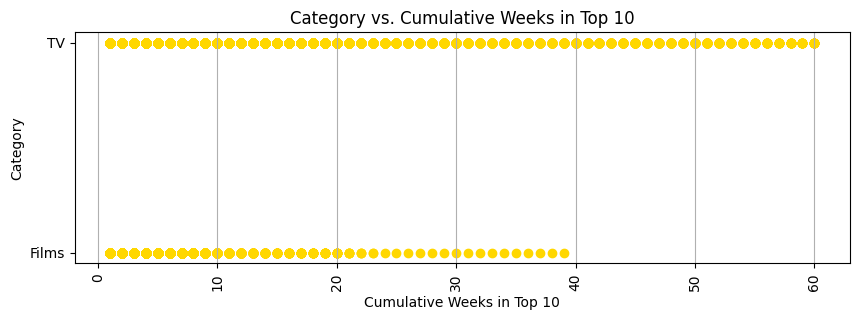

In [10]:
plt.figure(figsize=(10, 3))
plt.scatter(top10['cumulative_weeks_in_top_10'], top10['category'], color='gold')
plt.xlabel('Cumulative Weeks in Top 10')
plt.ylabel('Category')
plt.title('Category vs. Cumulative Weeks in Top 10')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

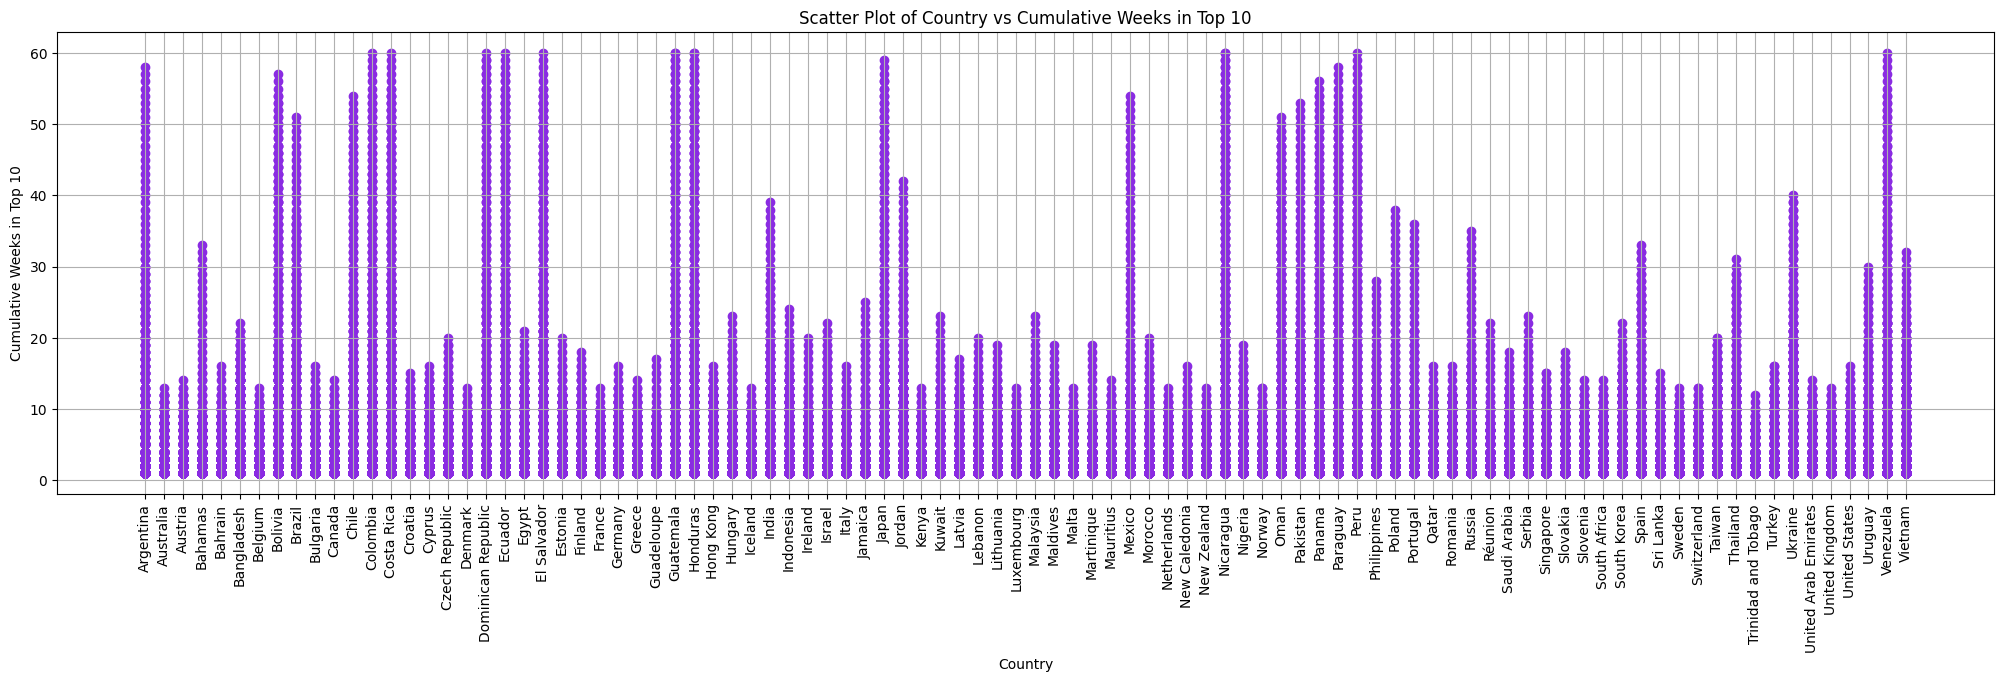

In [11]:
plt.figure(figsize=(25, 6))
plt.scatter(top10['country_name'], top10['cumulative_weeks_in_top_10'], color='blueviolet')
plt.xlabel('Country')
plt.ylabel('Cumulative Weeks in Top 10')
plt.title('Scatter Plot of Country vs Cumulative Weeks in Top 10')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### **Initial Results and Code**

Does date correlate with shows that have larger cumulative weeks in Top 10?

month
1     3.827766
2     3.475399
3     3.834274
4     4.151882
5     4.122366
6     3.916801
7     3.080856
8     3.216422
9     2.750665
10    2.745319
11    3.424202
12    3.754388
Name: cumulative_weeks_in_top_10, dtype: float64


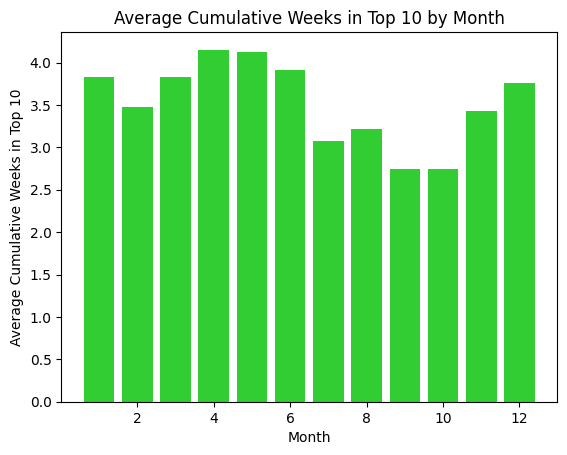

[array([ 2,  3,  1, ..., 21,  1,  3]), array([1, 2, 1, ..., 3, 1, 3]), array([ 1,  2,  2, ..., 13, 25,  3]), array([ 1,  4,  1, ..., 28,  6,  1]), array([ 2,  2,  2, ...,  1,  2, 32]), array([1, 2, 1, ..., 5, 3, 7]), array([1, 2, 1, ..., 1, 1, 1]), array([1, 2, 2, ..., 2, 4, 5]), array([ 1,  2,  2, ..., 10, 10,  7]), array([ 1,  1,  1, ..., 14, 14,  8]), array([ 1,  1,  3, ..., 18, 18, 18]), array([ 1,  1,  2, ...,  1,  7, 12])]
KruskalResult(statistic=798.6599409998698, pvalue=3.674882741765935e-164)


In [12]:
#Calculate the average cumulative_weeks_in_top_10 for each month
top10['week'] = pd.to_datetime(top10['week'])
top10['month'] = top10['week'].dt.month

average_weeks_top_10_monthly = top10.groupby('month')['cumulative_weeks_in_top_10'].mean()
print(average_weeks_top_10_monthly)

#view distribution of the average cumulative_weeks_in_top_10 for each month
plt.bar(average_weeks_top_10_monthly.index, average_weeks_top_10_monthly.values, color = "limegreen")
plt.xlabel('Month')
plt.ylabel('Average Cumulative Weeks in Top 10')
plt.title('Average Cumulative Weeks in Top 10 by Month')
plt.show()

#The data is non-normally distributed thus we must use non-parametric statistics to
#determine the significance of the relationship between month and cumulative weeks in top 10
from scipy.stats import kruskal

data_by_month = [group.values for name, group in top10.groupby('month')['cumulative_weeks_in_top_10']]
print(data_by_month)

kruskal_result = kruskal(*data_by_month)
print(kruskal_result)

In [13]:
from itertools import combinations
from scipy.stats import ttest_ind

months = top10['month'].unique()

#Assuming the dataset is sufficiently large, we can perform t-tests on the
#average cumualtive weeks in top 10 between each month

''' from these results we can infer which months have significant relationships and if signifcant,
whether there is a TV consumption trend'''

for month1, month2 in combinations(months, 2):
    data_month1 = top10[top10['month'] == month1]['cumulative_weeks_in_top_10']
    data_month2 = top10[top10['month'] == month2]['cumulative_weeks_in_top_10']

    t_statistic, p_value = ttest_ind(data_month1, data_month2)

    print(f"t-test between month {month1} and month {month2}:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

t-test between month 8 and month 7:
t-statistic: 2.2826475001277426
p-value: 0.022457711439931027

t-test between month 8 and month 6:
t-statistic: -8.345107815884798
p-value: 7.52103500068677e-17

t-test between month 8 and month 5:
t-statistic: -11.433355372990585
p-value: 3.4038920819053535e-30

t-test between month 8 and month 4:
t-statistic: -11.723393867829902
p-value: 1.1965784751814039e-31

t-test between month 8 and month 3:
t-statistic: -8.15789419545575
p-value: 3.5866989719926787e-16

t-test between month 8 and month 2:
t-statistic: -3.6105253323563606
p-value: 0.0003062414208590005

t-test between month 8 and month 1:
t-statistic: -9.479776916863766
p-value: 2.7728148746402483e-21

t-test between month 8 and month 12:
t-statistic: -8.000897214186281
p-value: 1.294415927300952e-15

t-test between month 8 and month 11:
t-statistic: -3.2330023507875816
p-value: 0.0012267304830323638

t-test between month 8 and month 10:
t-statistic: 8.483800036374486
p-value: 2.30161255525832

Are shows that make the top 10 in the United States more likely to make the top 10 in other countries? Western countries? English speaking countries?

In [14]:
# A list of every country for which top 10 data is included in the dataset
countries = top10["country_name"].unique()
print(countries)

print("\n")

num_countries = len(countries)
print(num_countries)

['Argentina' 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bolivia' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Guadeloupe' 'Guatemala' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique'
 'Mauritius' 'Mexico' 'Morocco' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Réunion' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Trinidad and Tobago' 'Turkey'
 'Ukraine' 'United Arab Emirates' 'United 

In [15]:
#The shows/movies that make the Top 10 in the United States
us_shows = top10[top10['country_name'] == 'United States']

#count the frequency of how many times each show_title appears in the Top 10 for the Unites States
us_show_frequency = us_shows.groupby('show_title').size()
us_show_frequency_sorted = us_show_frequency.sort_values(ascending=False)

#the top 10 most frequently occuring shows/movies that make the top 10 in the United States
us_top10 = us_show_frequency_sorted.head(10)
print(us_top10)


show_title
CoComelon          52
Stranger Things    43
Ozark              23
Manifest           20
All American       18
Virgin River       15
Bridgerton         12
You                11
The Witcher        11
Squid Game         11
dtype: int64


In [16]:
#The shows/movies that make the Top 10 in Canada
can_shows = top10[top10['country_name'] == 'Canada']

#count the frequency of how many times each show_title appears in the Top 10 for Canada
can_show_frequency = can_shows.groupby('show_title').size()
can_show_frequency_sorted = can_show_frequency.sort_values(ascending=False)

#the top 10 most frequently occuring shows/movies that make the top 10 in Canada
can_top10 = can_show_frequency_sorted.head(10)
print(can_top10)

show_title
Stranger Things    37
Ozark              21
Blindspot          21
Manifest           14
Young Sheldon      13
Maid               12
Bridgerton         12
The Witcher        11
Love Is Blind      11
You                11
dtype: int64


In [17]:
'''Count the number of times Top 10 US shows/movies make the Top 10 in other countries'''

top10_frequency_by_country = {}

#Compute frequency of each show in the top 10 for each country that is not the US
for country in top10['country_name'].unique():
    if country != 'United States':
        country_shows = top10[top10['country_name'] == country]
        country_show_frequency = country_shows['show_title'].value_counts().head(10)
        top10_frequency_by_country[country] = country_show_frequency

#DataFrame to store contingency table
contingency_table = pd.DataFrame(index=us_top10.index, columns=top10_frequency_by_country.keys())

#Fill the contingency table with frequency counts
for country, country_frequency in top10_frequency_by_country.items():
    for show in us_top10.index:
        # Fill in the frequency count for each show in the top 10 for the current country
        contingency_table.loc[show, country] = country_frequency.get(show, 0)

#Fill the contingency table for the US
for show in us_top10.index:
    contingency_table.loc[show, 'United States'] = us_show_frequency.get(show, 0)

print(contingency_table)

                Argentina Australia Austria Bahamas Bahrain Bangladesh  \
show_title                                                               
CoComelon               0         0       0      17       0          0   
Stranger Things        24        41      40      30      36         44   
Ozark                   0        14       0      13       0          0   
Manifest               15        26      20      16       0         21   
All American            0         0       0       0       0          0   
Virgin River            0        13       0      12       0          0   
Bridgerton              0        14      13      11      13          0   
You                     0        12      15       0      11          0   
The Witcher             0         0      12       0      12          0   
Squid Game             11        11      12       0      16         22   

                Belgium Bolivia Brazil Bulgaria  ... Thailand  \
show_title                                    

In [18]:
'''Calculate whether the results in the contingency table above are significant'''

import numpy as np
from scipy.stats import chi2_contingency

p_values = {}

for country in contingency_table.columns:
    # Extract observed frequencies for the current country
    observed_frequencies = contingency_table[country].values.astype(float)
    row_totals = contingency_table.sum(axis=1)
    column_totals = contingency_table.sum(axis=0)
    expected_frequencies = np.outer(row_totals, column_totals) / row_totals.sum()
    expected_frequencies = expected_frequencies[:, contingency_table.columns.get_loc(country)]

    chi2_stat, p_value, _, _ = chi2_contingency([observed_frequencies, expected_frequencies])

    p_values[country] = p_value


for country, p_value in p_values.items():
    print(f"{country}: {p_value}")


print("\n")

'''Here, significant countries suggests that in these countries, a show/movie that makes
the Top 10 in the US is likely to make the Top 10 in the listed country. Possibly, the US market may
influence the markets in these other countries.'''

significant_countries = [country for country, p_value in p_values.items() if p_value < 0.01]
print("List of Significant Countries", significant_countries)

Argentina: 0.028787031633686188
Australia: 0.014589738469597569
Austria: 0.09908073729779852
Bahamas: 1.6428018500900734e-07
Bahrain: 0.00040544203937159415
Bangladesh: 0.00016475360623926946
Belgium: 0.07575420324457381
Bolivia: 0.0070270105095409235
Brazil: 0.002305190808831503
Bulgaria: 0.05274111160975641
Canada: 3.7241957280345492e-06
Chile: 0.0027174447198394522
Colombia: 0.004851091032492417
Costa Rica: 0.022772288597190448
Croatia: 0.020101224321794453
Cyprus: 0.036197197212430726
Czech Republic: 1.9325766371444175e-05
Denmark: 0.007930065789479997
Dominican Republic: 0.0206159800194768
Ecuador: 0.03946046413725036
Egypt: 2.577880163511151e-05
El Salvador: 0.06337385755013583
Estonia: 0.00018414750490193212
Finland: 0.03380490569942349
France: 0.023836926402612604
Germany: 0.0017473424514078122
Greece: 0.021830932614843312
Guadeloupe: 0.02470583816573554
Guatemala: 0.04796088964421329
Honduras: 0.07860712593283108
Hong Kong: 0.02204444827856596
Hungary: 1.5212543936266608e-06
I

/usr/local/lib/python3.10/dist-packages/scipy/stats/contingency.py:134: RuntimeWarning: invalid value encountered in divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [19]:
print("Number of significant countries: ", len(significant_countries))

#English language countries as per The University of Tennessee Knoxville
#Note this list does not include the UK, Australia but I have added them in

#strong limitation is the definition of english-language country
#not every country is listed and not every country was checked against the 94 countries in the dataset
'''https://gradschool.utk.edu/future-students/office-of-graduate-admissions/applying-to-graduate-school/
admission-requirements/testing-requirements/countries-with-english-as-official-language/'''

english_speaking_countries = [
    'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Belgium', 'Bermuda', 'Botswana',
    'British Virgin Islands', 'Burundi', 'Cameroon', 'Canada', 'Cayman Islands', 'Christmas Island', 'Cook Islands',
    'Dominica', 'Fiji', 'Gambia', 'Ghana', 'Grenada', 'Guyana', 'Hong Kong', 'India', 'Ireland', 'Jersey', 'Kenya',
    'Liberia', 'Malawi', 'Malta', 'Marshall Islands', 'Micronesia', 'Namibia', 'New Zealand',
    'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Pakistan', 'Palau', 'Papua New Guinea',
    'Philippines', 'Pitcairn Islands', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Sint Maarten', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
    'Swaziland', 'Tanzania', 'Tonga', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Zambia',
    'Zimbabwe', 'United Kingdom', 'Australia']

# Of the significant countries, which are english-speaking?
num_significant_english_speaking_countries = 0

for country in significant_countries:
    if country in english_speaking_countries:
        num_significant_english_speaking_countries = num_significant_english_speaking_countries + 1

print("Number of significant english speaking countries: ", num_significant_english_speaking_countries)

Number of significant countries:  52
Number of significant english speaking countries:  10


                                     show_title category  weekly_rank  \
107500                                Day Shift    Films            1   
107501                           Look Both Ways    Films            2   
107502  Untold: The Girlfriend Who Didn't Exist    Films            3   
107503                                Uncharted    Films            4   
107504                                   Sing 2    Films            5   
...                                         ...      ...          ...   
108695                                CoComelon       TV            6   
108696                   Newly Rich, Newly Poor       TV            7   
108697                              Sweet Tooth       TV            8   
108698                                CoComelon       TV            9   
108699                                CoComelon       TV           10   

         country_name  is_top_10_canada  
107500  United States                 1  
107501  United States                 1

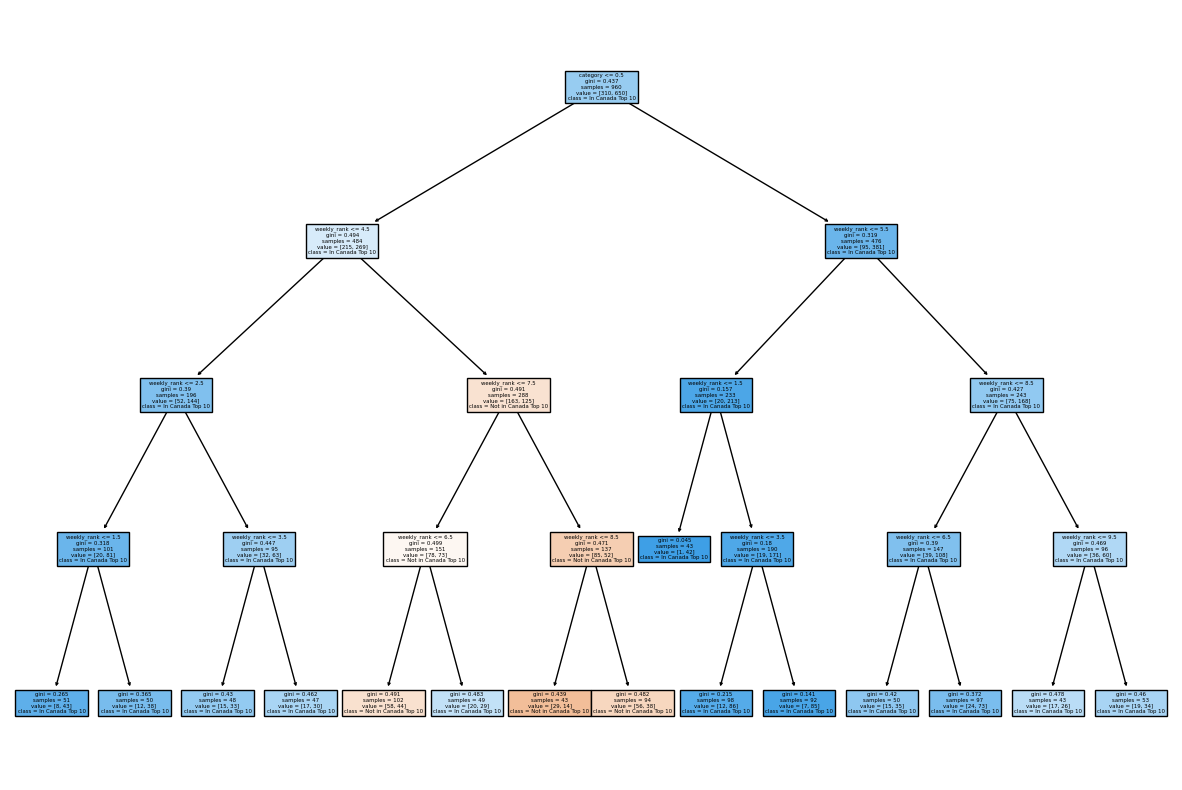

In [20]:
'''Can we use classification to predict whether Top 10 US shows make the Top 10 in Canada?'''

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

us_shows = top10[top10['country_name'] == 'United States']

# Determine target variable indicating whether the show made it to the top 10 in Canada
target_variable = (us_shows['show_title'].isin(top10[top10['country_name'] == 'Canada']['show_title'])).astype(int)

# Combine features and target variable into a dataset
prepared_dataset = pd.concat([us_shows[['show_title', 'category', 'weekly_rank', 'country_name']], target_variable], axis=1)
prepared_dataset.columns = ['show_title', 'category', 'weekly_rank', 'country_name', 'is_top_10_canada']

print(prepared_dataset)

prepared_dataset['category'] = prepared_dataset['category'].map({'Films': 0, 'TV': 1})
X = prepared_dataset[['weekly_rank', 'category']]
y = prepared_dataset['is_top_10_canada']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the decision tree classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=["Not in Canada Top 10", "In Canada Top 10"], filled=True)
plt.show()


Cross-validation Scores: [0.72916667 0.70833333 0.68229167 0.734375   0.671875  ]
Mean CV Score: 0.7052083333333333
Confusion Matrix:
[[ 35  46]
 [ 33 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47        81
           1       0.73      0.79      0.76       159

    accuracy                           0.67       240
   macro avg       0.62      0.61      0.62       240
weighted avg       0.66      0.67      0.66       240



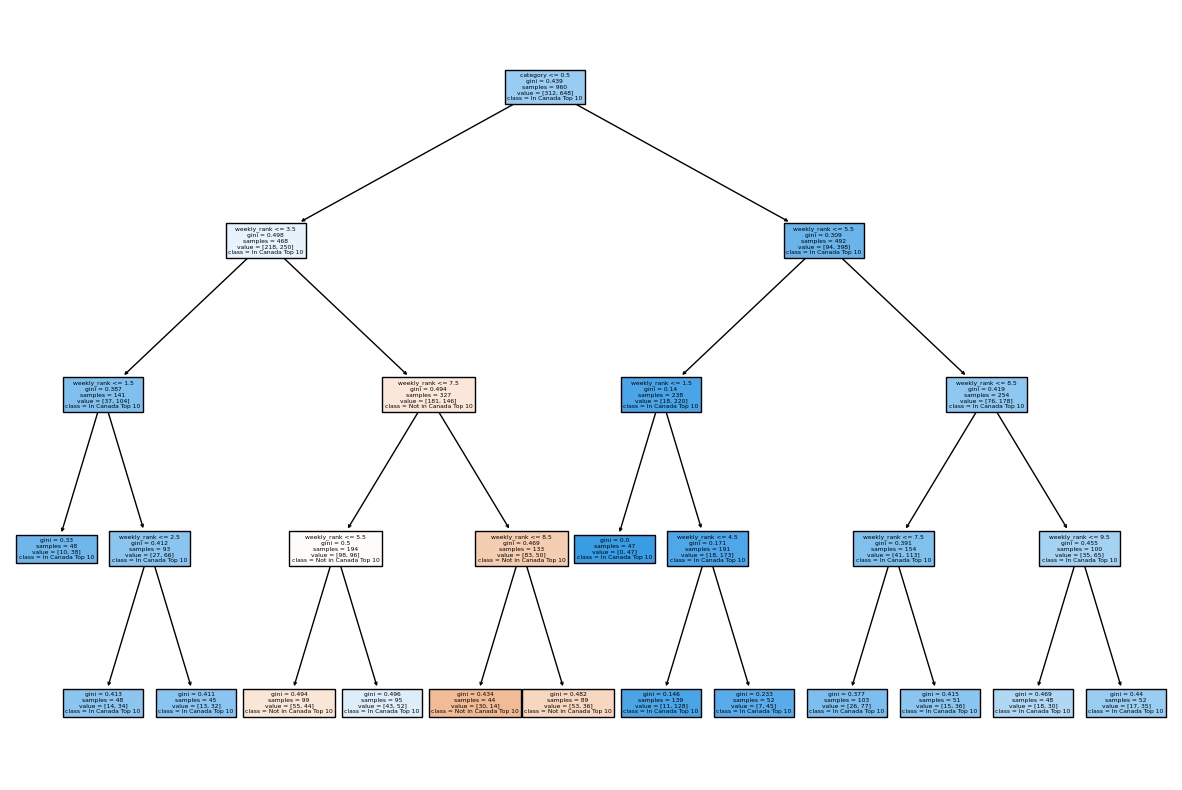

In [27]:
'''Can we use classification to predict whether Top 10 US shows make the Top 10 in Canada?
Using cross validation and different random state'''
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming top10 and us_shows are defined earlier

# Determine target variable indicating whether the show made it to the top 10 in Canada
target_variable = (us_shows['show_title'].isin(top10[top10['country_name'] == 'Canada']['show_title'])).astype(int)

# Combine features and target variable into a dataset
prepared_dataset = pd.concat([us_shows[['show_title', 'category', 'weekly_rank', 'country_name']], target_variable], axis=1)
prepared_dataset.columns = ['show_title', 'category', 'weekly_rank', 'country_name', 'is_top_10_canada']

prepared_dataset['category'] = prepared_dataset['category'].map({'Films': 0, 'TV': 1})
X = prepared_dataset[['weekly_rank', 'category']]
y = prepared_dataset['is_top_10_canada']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the decision tree classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=["Not in Canada Top 10", "In Canada Top 10"], filled=True)
plt.show()

                                     show_title category  weekly_rank  \
107500                                Day Shift    Films            1   
107501                           Look Both Ways    Films            2   
107502  Untold: The Girlfriend Who Didn't Exist    Films            3   
107503                                Uncharted    Films            4   
107504                                   Sing 2    Films            5   
...                                         ...      ...          ...   
108695                                CoComelon       TV            6   
108696                   Newly Rich, Newly Poor       TV            7   
108697                              Sweet Tooth       TV            8   
108698                                CoComelon       TV            9   
108699                                CoComelon       TV           10   

         country_name  is_top_10_Argentina  
107500  United States                    1  
107501  United States            

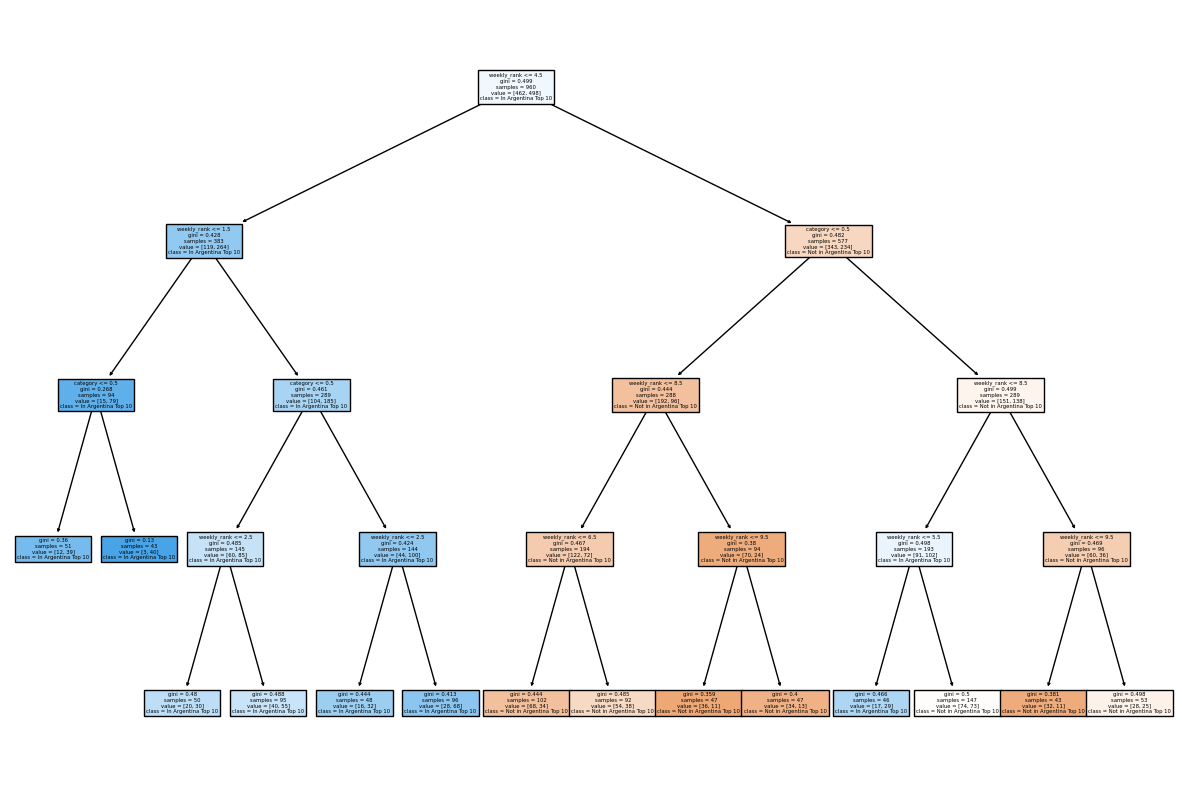

In [28]:
'''Can we use classification to predict whether Top 10 US shows make the Top 10 in Argentina?'''

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

us_shows = top10[top10['country_name'] == 'United States']

# Determine target variable indicating whether the show made it to the top 10 in Argentina
target_variable = (us_shows['show_title'].isin(top10[top10['country_name'] == 'Argentina']['show_title'])).astype(int)

# Combine features and target variable into a dataset
prepared_dataset = pd.concat([us_shows[['show_title', 'category', 'weekly_rank', 'country_name']], target_variable], axis=1)
prepared_dataset.columns = ['show_title', 'category', 'weekly_rank', 'country_name', 'is_top_10_Argentina']

print(prepared_dataset)

prepared_dataset['category'] = prepared_dataset['category'].map({'Films': 0, 'TV': 1})
X = prepared_dataset[['weekly_rank', 'category']]
y = prepared_dataset['is_top_10_Argentina']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the decision tree classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=["Not in Argentina Top 10", "In Argentina Top 10"], filled=True)
plt.show()


Do TV shows with more seasons make the top 10 list more often? Have larger number of cumulative weeks in Top 10?

In [25]:
#subset data to include rows where season_title is included
subset = top10[top10['season_title'].notnull()]
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54668 entries, 10 to 112299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country_name                54668 non-null  object        
 1   country_iso2                54668 non-null  object        
 2   week                        54668 non-null  datetime64[ns]
 3   category                    54668 non-null  object        
 4   weekly_rank                 54668 non-null  int64         
 5   show_title                  54668 non-null  object        
 6   season_title                54668 non-null  object        
 7   cumulative_weeks_in_top_10  54668 non-null  int64         
 8   month                       54668 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 4.2+ MB
None


In [29]:
#view format of season_title entries
print(subset['season_title'].head(60))

#add column season_number of the numeric part of season_title
subset['season_number'] = subset['season_title'].str.extract(r'(\d+)')

'''some season_title entries do not include a number'''
print(subset['season_number'].head(60))

10            Pasión de Gavilanes: Season 2
11                   Another Self: Season 1
12            Pasión de Gavilanes: Season 1
13                       Manifest: Season 1
14                    The Sandman: Season 1
15     Extraordinary Attorney Woo: Season 1
16                      High Heat: Season 1
17                       Manifest: Season 2
18                       Manifest: Season 3
19              Never Have I Ever: Season 3
30            Pasión de Gavilanes: Season 2
31                   Another Self: Season 1
32                    The Sandman: Season 1
33            Pasión de Gavilanes: Season 1
34                       Manifest: Season 1
35     Extraordinary Attorney Woo: Season 1
36                           Alba: Season 1
37                       Manifest: Season 2
38                       Manifest: Season 3
39              Never Have I Ever: Season 3
50            Pasión de Gavilanes: Season 2
51                       Manifest: Season 1
52                   Another Sel

<ipython-input-29-5dfa299473e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['season_number'] = subset['season_title'].str.extract(r'(\d+)')


In [30]:
#subset data to include rows where season_number is included
subset2 = subset[subset['season_number'].notnull()]
print(subset2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50640 entries, 10 to 112299
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country_name                50640 non-null  object        
 1   country_iso2                50640 non-null  object        
 2   week                        50640 non-null  datetime64[ns]
 3   category                    50640 non-null  object        
 4   weekly_rank                 50640 non-null  int64         
 5   show_title                  50640 non-null  object        
 6   season_title                50640 non-null  object        
 7   cumulative_weeks_in_top_10  50640 non-null  int64         
 8   month                       50640 non-null  int64         
 9   season_number               50640 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 4.2+ MB
None


In [31]:
'''The method of isolating season_number includes many errors.
For our sake we will look at only entries where season number is 10 or smaller'''

#many errors exist when isolating season number from season_title
unique_season_numbers = subset2['season_number'].unique()
print(unique_season_numbers)

#convert season_number to int type
subset2.loc[:, 'season_number'] = subset2['season_number'].fillna(-5).astype(int)

subset3 = subset2.loc[(subset2['season_number'] > 0) & (subset2['season_number'] < 11), :]

unique_season_numbers_again = subset3['season_number'].unique()
print(unique_season_numbers_again)

['2' '1' '3' '4' '6' '5' '42' '81' '17' '100' '8' '99' '7' '15' '11' '9'
 '14' '245' '101' '1988' '18' '24' '10' '2011' '13' '١' '12' '56' '892'
 '2045' '2020' '20' '97' '2022' '2021' '800' '1867' '60']
[ 2  1  3  4  6  5  8  7  9 10]


<ipython-input-31-4c5af1bdabe4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2.loc[:, 'season_number'] = subset2['season_number'].fillna(-5).astype(int)
<ipython-input-31-4c5af1bdabe4>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset2.loc[:, 'season_number'] = subset2['season_number'].fillna(-5).astype(int)


   season_number  average_cumulative_weeks_in_top_10
0              1                            6.106364
1              2                            3.799366
2              3                            3.333964
3              4                            4.119763
4              5                            4.675585
5              6                            4.346075
6              7                            3.378277
7              8                            2.740964
8              9                            6.077586
9             10                            2.117647
Pearson correlation coefficient: -0.35851553225279903
P-value: 0.3090139342720427


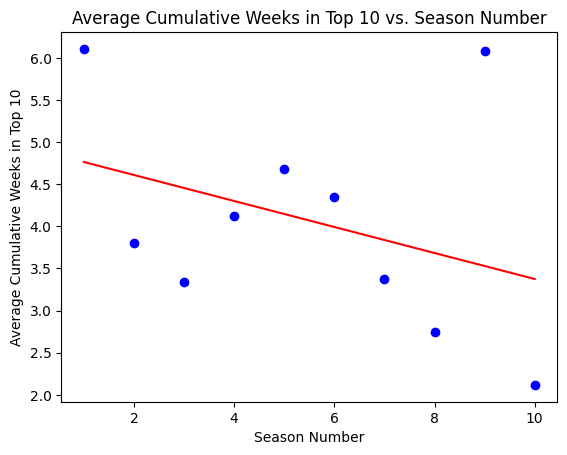

In [32]:
'''subset3 is our dataset now'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#average cumulative weeks in top 10 for each season number 1 through 10
average_cumulative_weeks = subset3.groupby('season_number')['cumulative_weeks_in_top_10'].mean().reset_index()
average_cumulative_weeks.columns = ['season_number', 'average_cumulative_weeks_in_top_10']
print(average_cumulative_weeks)

#initiliaze variables for statistical analysis
season_number = average_cumulative_weeks['season_number']
average_cumulative_weeks_in_top_10 = average_cumulative_weeks['average_cumulative_weeks_in_top_10']

'''In this context season number can be numeric instead of rank because
we want to see if higher season number shows higher average cumulative weeks in top 10'''

correlation_coefficient, p_value = pearsonr(season_number, average_cumulative_weeks_in_top_10)
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

plt.scatter(season_number, average_cumulative_weeks_in_top_10, color='blue', label='Data Points')
plt.plot(season_number, np.poly1d(np.polyfit(season_number, average_cumulative_weeks_in_top_10, 1))(season_number), color='red')
plt.xlabel('Season Number')
plt.ylabel('Average Cumulative Weeks in Top 10')
plt.title('Average Cumulative Weeks in Top 10 vs. Season Number')
plt.show()

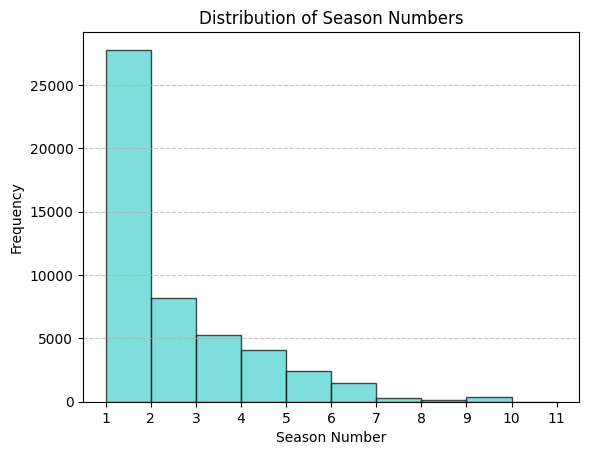

In [33]:
'''We can view a histogram of season_number to determine which number of seasons makes the Top 10 list the most often'''

plt.hist(subset3['season_number'], bins=range(1, 12), edgecolor='black', color = 'mediumturquoise', alpha=0.7)
plt.xlabel('Season Number')
plt.ylabel('Frequency')
plt.title('Distribution of Season Numbers')
plt.xticks(range(1, 12))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Are TV shows or movies more likely to spend a longer amount of cumulative time on the Top 10 list?

RECALL: Some TV shows made the Top 10 list for up to 60 consecutive weeks, whereas, movies only made the list for up to 40 weeks (yellow scatterplot above)

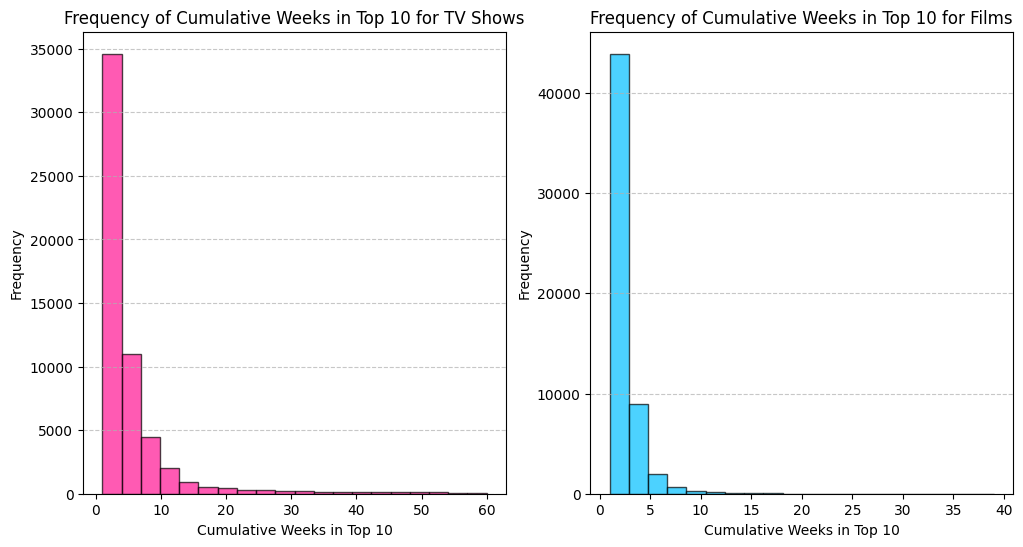

In [34]:
'''lets look at the cumulative weeks on top 10 frequency distribution for TV shows and movies seperately'''

tv_shows_subset = top10[top10['category'] == 'TV']

movies_shows_subset = top10[top10['category'] == 'Films']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(tv_shows_subset['cumulative_weeks_in_top_10'], bins=20, edgecolor='black', color = 'deeppink', alpha=0.7)
axes[0].set_xlabel('Cumulative Weeks in Top 10')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Cumulative Weeks in Top 10 for TV Shows')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].hist(movies_shows_subset['cumulative_weeks_in_top_10'], bins=20, edgecolor='black', color = 'deepskyblue', alpha=0.7)
axes[1].set_xlabel('Cumulative Weeks in Top 10')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Cumulative Weeks in Top 10 for Films')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

In [35]:
#Calculate average cumulative weeks in top 10 for films and TV categories
avg_cumulative_weeks_tv = tv_shows_subset['cumulative_weeks_in_top_10'].mean()
print(avg_cumulative_weeks_tv)

avg_cumulative_weeks_films = movies_shows_subset['cumulative_weeks_in_top_10'].mean()
print(avg_cumulative_weeks_films)

#samples are unpaired and non-normally distributed so we will perform wilcoxon rank sum test
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(tv_shows_subset['cumulative_weeks_in_top_10'], movies_shows_subset['cumulative_weeks_in_top_10'])

print("Wilcoxon Rank Sum test statistic:", statistic)
print("P-value:", p_value)

4.936420302760463
2.000142475512021
Wilcoxon Rank Sum test statistic: 2152311801.0
P-value: 0.0
